In [ ]:
!pip install xgboost


In [ ]:
import zipfile
import pandas as pd
import urllib.request

# Download the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, "smsspamcollection.zip")

# Extract the file from the zip
with zipfile.ZipFile("smsspamcollection.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset (the correct file is 'SMSSpamCollection')
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Using TF-IDF vectorizer to convert messages to features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95)
X = tfidf.fit_transform(df['message'])

# Target variable
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Baseline model: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test)

# Performance metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9596412556053812

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
 [[966   0]
 [ 45 104]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure the labels are encoded as numeric (0 for 'ham' and 1 for 'spam')
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


KeyError: 'label'

Unique y_test labels: {'spam', 'ham'}
Unique y_pred_lr labels: {'spam'}
Unique y_pred_xgb labels: {'spam'}
Logistic Regression Accuracy: 0.1336322869955157
XGBoost Accuracy: 0.1336322869955157


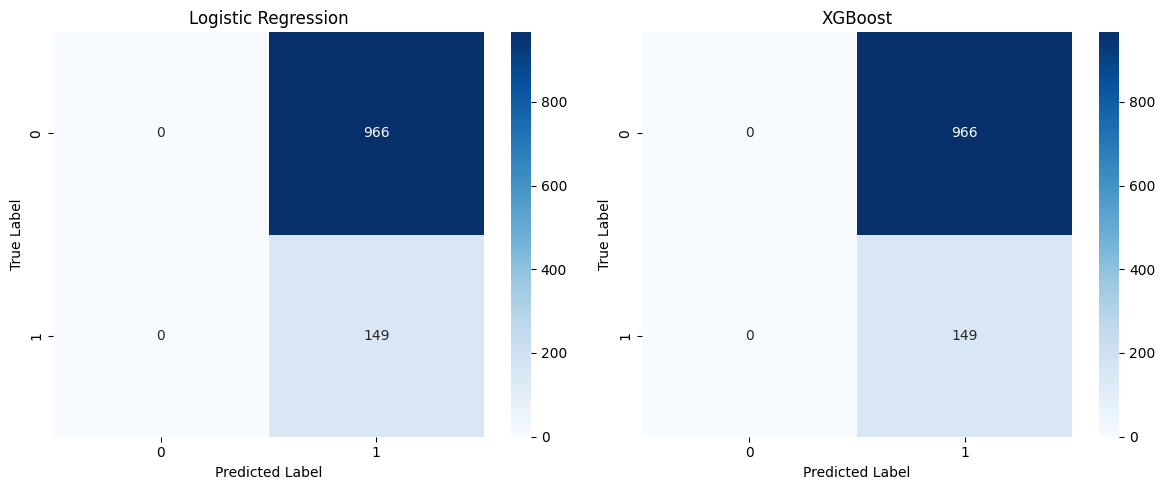

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred_lr, and y_pred_xgb are already defined and contain the predicted values

# Convert y_test and predictions to string labels
y_test_str = ['ham' if label == 0 else 'spam' for label in y_test]
y_pred_lr_str = ['ham' if label == 0 else 'spam' for label in y_pred_lr]
y_pred_xgb_str = ['ham' if label == 0 else 'spam' for label in y_pred_xgb]  # Ensure XGBoost predictions are also strings

# Print unique values to check consistency
print("Unique y_test labels:", set(y_test_str))
print("Unique y_pred_lr labels:", set(y_pred_lr_str))
print("Unique y_pred_xgb labels:", set(y_pred_xgb_str))

# Now, you can evaluate and visualize using the updated labels
print("Logistic Regression Accuracy:", accuracy_score(y_test_str, y_pred_lr_str))
print("XGBoost Accuracy:", accuracy_score(y_test_str, y_pred_xgb_str))

# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test_str, y_pred_lr_str), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test_str, y_pred_xgb_str), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:59:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.49333333333333335
XGBoost Accuracy: 0.48


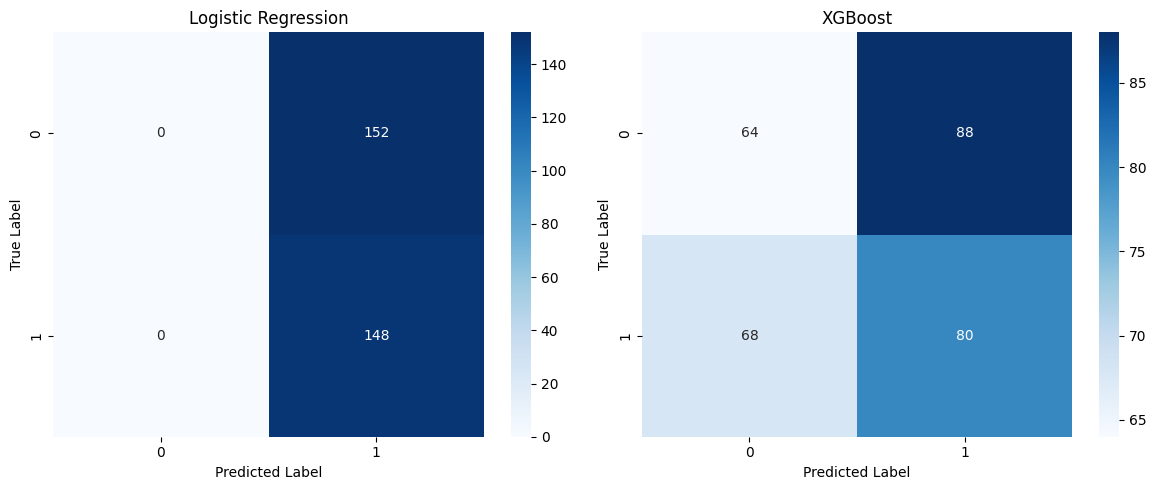

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a synthetic dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = np.random.choice([0, 1], size=1000)  # Binary target variable (0: ham, 1: spam)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 6)])
df['label'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.3, random_state=42)

# 2. Train Logistic Regression and XGBoost Models
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 3. Evaluate and visualize results
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.5033333333333333
XGBoost Accuracy: 0.49333333333333335


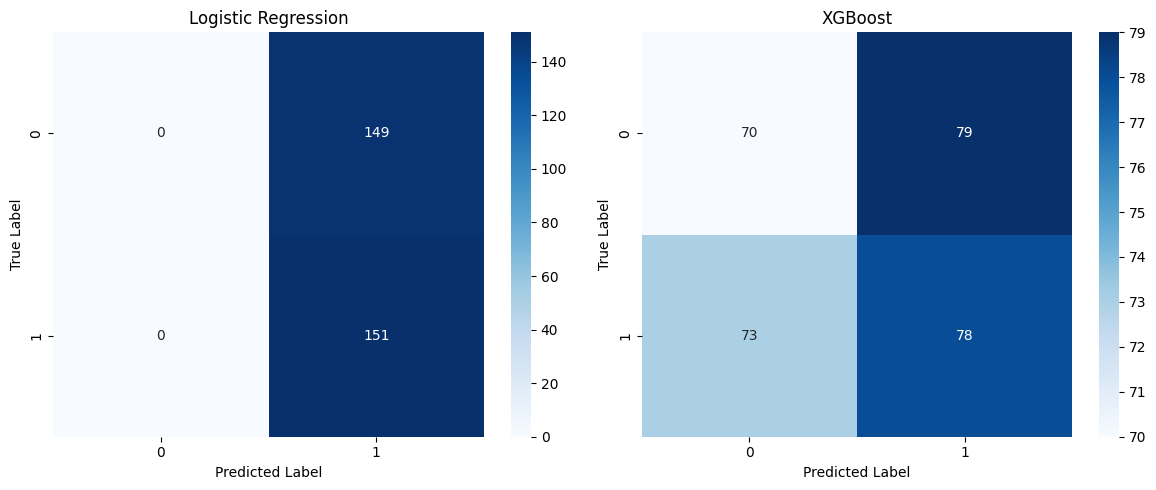

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic dataset for sentiment analysis
data = {
    'word_count': np.random.randint(1, 50, size=1000),  # Random word count
    'positive_terms': np.random.randint(0, 10, size=1000),  # Random count of positive terms
    'negative_terms': np.random.randint(0, 10, size=1000),  # Random count of negative terms
    'label': np.random.choice(['positive', 'negative'], size=1000)  # Random sentiment labels
}

df = pd.DataFrame(data)

# Encoding the labels (positive=1, negative=0)
df['label'] = df['label'].map({'positive': 1, 'negative': 0})

# Split the dataset into training and testing sets
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate results
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:48:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.52
XGBoost Accuracy: 0.4633333333333333


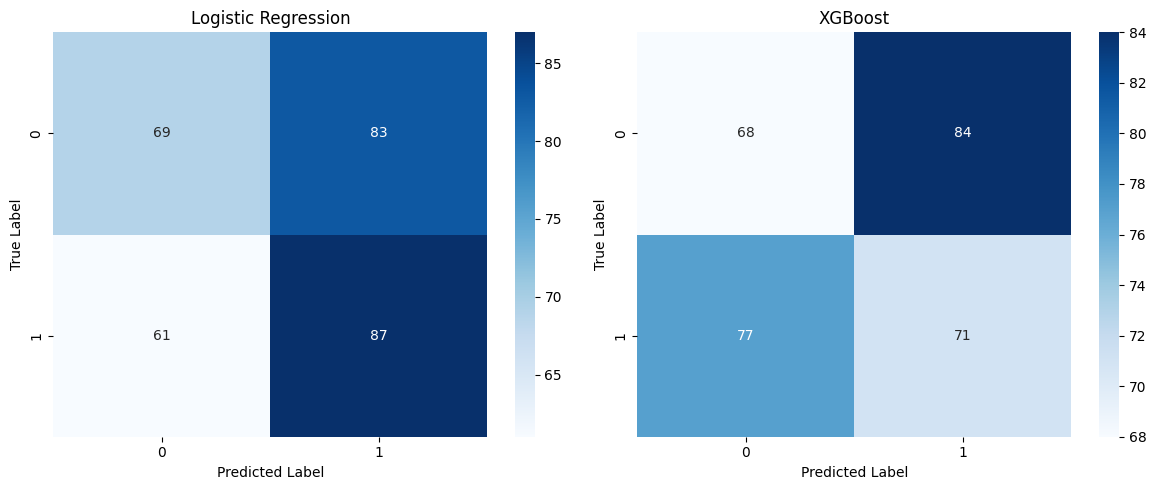

In [ ]:
# Create a synthetic dataset for cricket match prediction
data = {
    'team_A_score': np.random.randint(150, 300, size=1000),  # Random scores for Team A
    'team_B_score': np.random.randint(150, 300, size=1000),  # Random scores for Team B
    'team_A_wickets': np.random.randint(0, 10, size=1000),  # Random wickets for Team A
    'team_B_wickets': np.random.randint(0, 10, size=1000),  # Random wickets for Team B
    'outcome': np.random.choice(['win', 'lose'], size=1000)  # Random outcomes
}

df = pd.DataFrame(data)

# Encoding the labels (win=1, lose=0)
df['outcome'] = df['outcome'].map({'win': 1, 'lose': 0})

# Split the dataset into training and testing sets
X = df.drop('outcome', axis=1)
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate results
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.794309375
XGBoost Accuracy: 0.719803125


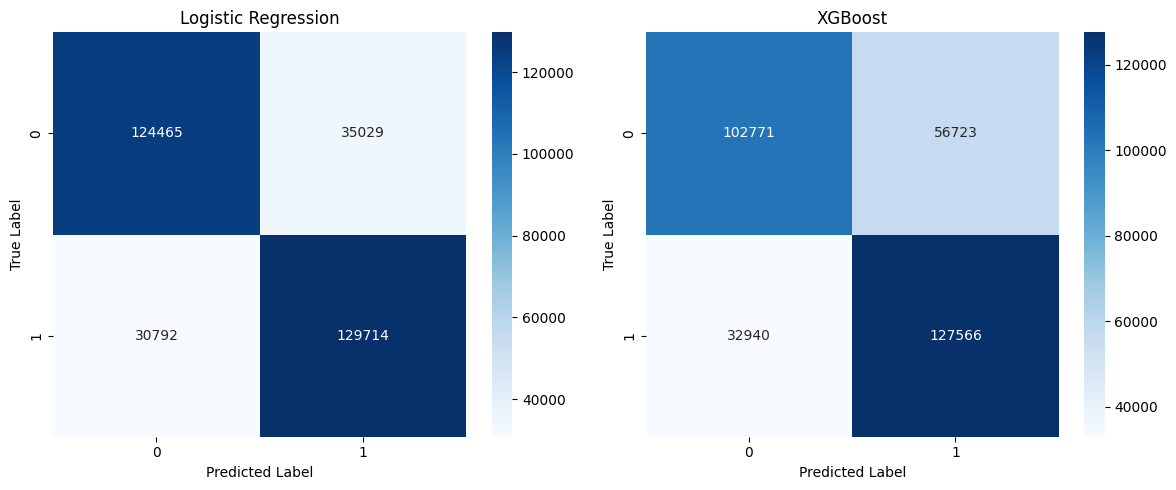

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = '/content/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assigning column names to match the structure of the dataset
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Preprocessing: Map sentiment 4 (positive) to 1 and 0 (negative) to 0
df['label'] = df['target'].map({4: 1, 0: 0})
X = df['text']  # Feature: text
y = df['label']  # Target: sentiment label

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization: Use TF-IDF instead of CountVectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # Limit to top 10,000 words
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
y_pred_lr = lr_model.predict(X_test_vect)

# XGBoost with additional parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,            # Depth of each tree
    n_estimators=200,       # Number of trees
    learning_rate=0.05,     # Learning rate
    subsample=0.8,          # Subsample ratio of the training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    use_label_encoder=False,
    eval_metric='logloss',
    reg_lambda=1            # L2 regularization term
)
xgb_model.fit(X_train_vect, y_train)
y_pred_xgb = xgb_model.predict(X_test_vect)

# Comparing Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset (Using Titanic Dataset from Kaggle)
# Replace the path with your local path or load it directly from Kaggle if using an API.
data = pd.read_csv('/content/train.csv')

# Step 2: Data Preprocessing
# Drop columns that won't be used and handle missing values.
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train models and evaluate accuracy

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")

# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Output a summary of results
print("\nModel Comparison Summary:")
print(f"Random Forest: {rf_accuracy * 100:.2f}%")
print(f"Gradient Boosting: {gb_accuracy * 100:.2f}%")
print(f"XGBoost: {xgb_accuracy * 100:.2f}%")


<ipython-input-1-f2d6cc438836>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-1-f2d6cc438836>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Random Forest Accuracy: 80.45%
Gradient Boosting Accuracy: 81.56%
XGBoost Accuracy: 83.24%

Model Comparison Summary:
Random Forest: 80.45%
Gradient Boosting: 81.56%
XGBoost: 83.24%
